In [127]:
################Module For Functional Programing#########################
from functools import reduce
from itertools import chain
from itertools import groupby
from copy import deepcopy
curry = lambda f: lambda a,*args: f(a, *args) if (len(args)) else lambda *args: f(a, *args)

filter = curry(filter)
map = curry(map)
reduce = curry(reduce)

go = lambda *args: reduce(lambda a,f: f(a), args) ## 함수도 축약 가능 ##

def dictUpdate(dic1,dic2):
    res = dic1.update(dic2)
    return dic1
    
def dictsMerge(dics):
    res = reduce(dictUpdate, dics)
    return res
    
def dictDeleteKeys(dic, keys):
    for k in keys:
        del dic[k]
    return dic

def flat(a):
    if isinstance(a, list):
        for i in a: 
            yield from flat(i)
    else: yield a

def grpBy(iter, key):
    f,keys,grps = key,[],[]
    sorted_ = sorted(iter, key=f)
    for key, grp_data in groupby(sorted_,key=f):
        keys.append(key); grps.append(list(grp_data))
    return grps,keys
#########################################################################

In [128]:
import numpy as np
import math
import matplotlib.pyplot as plt
import shapely
from shapely.plotting import plot_polygon
from shapely import Point
from shapely import box
from sympy import Symbol, solve
from itertools import combinations

Ser=    [3022,   0,      0,     0,   0]                     # Ps, Vsx, Vsy, Msx, Msy
Uls=    [4048,   0,      0,     0,   0]                     # Pu, Vux, Vuy, Mux, Muy
Pile=   [1300,  300,     200,     0.5,     3,     0.1]      # P, V, T Capacity of Pile, Diameter of Pile, Pile Spacing, Embed depth
Mat=    [24,    400,     0.05,     16]                      # f'c, fy, cc, Rebar Dia
SpW=    [0,       0,       0,       0]                      # Surchage, Conc, Soil, height
Ped=    [0.6,   1.0]                                        # Pedestal Size
w=      SpW[0]+(SpW[1]+SpW[2])/2*SpW[3]                     # Average of Specific Weight
S=      Pile[3]*Pile[4]

In [129]:
Xi=     np.array([
        [0, 0,    0, -S/2, -S*3/4, -S/2,       0, -S*9/10, -S,       0],
        [0, 0, -S/2,  S/2,  S*3/4,  S/2, -S*9/10,  S*9/10,  0, -S*9/10],
        [0, 0,  S/2, -S/2,      0, -S/2,  S*9/10,       0,  S,  S*9/10],
        [0, 0,    0,  S/2, -S*3/4,  S/2,       0, -S*9/10, -S,       0],
        [0, 0,    0,    0,  S*3/4, -S/2, -S*9/10,  S*9/10,  0, -S*9/10],
        [0, 0,    0,    0,      0,  S/2,  S*9/10,       0,  S,  S*9/10],
        [0, 0,    0,    0,      0,    0,       0, -S*9/10, -S,       0],
        [0, 0,    0,    0,      0,    0,       0,  S*9/10,  0, -S*9/10],
        [0, 0,    0,    0,      0,    0,       0,       0,  S,  S*9/10],
        [0, 0,    0,    0,      0,    0,       0,       0,  0,       0],
                 ])


Yi=     np.array([
        [0,  S/2,   S*3/5,  S/2,  S*3/4,  S,    S,    S,  S,  S*3/2],
        [0, -S/2, -S*3/10,  S/2,  S*3/4,  S,  S/2,    S,  S,      S],
        [0,    0, -S*3/10, -S/2,      0,  0,  S/2,  S/2,  S,      S],
        [0,    0,       0, -S/2, -S*3/4,  0,    0,    0,  0,    S/2],
        [0,    0,       0,    0, -S*3/4, -S, -S/2,    0,  0,      0],
        [0,    0,       0,    0,      0, -S, -S/2, -S/2,  0,      0],
        [0,    0,       0,    0,      0,  0,   -S,   -S, -S,   -S/2],
        [0,    0,       0,    0,      0,  0,    0,   -S, -S,     -S],
        [0,    0,       0,    0,      0,  0,    0,    0, -S,     -S],
        [0,    0,       0,    0,      0,  0,    0,    0,  0, -S*3/2],
                ])

Lxy=    np.array([
         [S,   S,     2*S, 2*S, S*5/2, 2*S, 28*S/10, 28*S/10, 3*S, 28*S/10],
         [S, 2*S, 19*S/10, 2*S, 5*S/2, 3*S,     3*S,     3*S, 3*S,     4*S]
                ])

Xi2=    Xi**2
Yi2=    Yi**2

print(Xi)
print(Yi)

[[ 0.     0.     0.    -0.75  -1.125 -0.75   0.    -1.35  -1.5    0.   ]
 [ 0.     0.    -0.75   0.75   1.125  0.75  -1.35   1.35   0.    -1.35 ]
 [ 0.     0.     0.75  -0.75   0.    -0.75   1.35   0.     1.5    1.35 ]
 [ 0.     0.     0.     0.75  -1.125  0.75   0.    -1.35  -1.5    0.   ]
 [ 0.     0.     0.     0.     1.125 -0.75  -1.35   1.35   0.    -1.35 ]
 [ 0.     0.     0.     0.     0.     0.75   1.35   0.     1.5    1.35 ]
 [ 0.     0.     0.     0.     0.     0.     0.    -1.35  -1.5    0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     1.35   0.    -1.35 ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     1.5    1.35 ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]]
[[ 0.     0.75   0.9    0.75   1.125  1.5    1.5    1.5    1.5    2.25 ]
 [ 0.    -0.75  -0.45   0.75   1.125  1.5    0.75   1.5    1.5    1.5  ]
 [ 0.     0.    -0.45  -0.75   0.     0.     0.75   0.75   1.5    1.5  ]
 [ 0.     0.     0.    -0.75  -1.125  0.     0.   

In [130]:
pileXY = list(zip(Xi,Yi))
pileCenterGrps = go(
    zip(Xi.tolist(),Yi.tolist()), list,
    map(lambda x: list(zip(x[0],x[1]))), list,
    # map(lambda x: list(map(lambda y: list(map(lambda z: z*1000, y)),x))),list,
    map(lambda x: list(map(Point,x))), list,
)

pileCenterGrps

[[<POINT (0 0)>,
  <POINT (0 0.75)>,
  <POINT (0 0.9)>,
  <POINT (-0.75 0.75)>,
  <POINT (-1.125 1.125)>,
  <POINT (-0.75 1.5)>,
  <POINT (0 1.5)>,
  <POINT (-1.35 1.5)>,
  <POINT (-1.5 1.5)>,
  <POINT (0 2.25)>],
 [<POINT (0 0)>,
  <POINT (0 -0.75)>,
  <POINT (-0.75 -0.45)>,
  <POINT (0.75 0.75)>,
  <POINT (1.125 1.125)>,
  <POINT (0.75 1.5)>,
  <POINT (-1.35 0.75)>,
  <POINT (1.35 1.5)>,
  <POINT (0 1.5)>,
  <POINT (-1.35 1.5)>],
 [<POINT (0 0)>,
  <POINT (0 0)>,
  <POINT (0.75 -0.45)>,
  <POINT (-0.75 -0.75)>,
  <POINT (0 0)>,
  <POINT (-0.75 0)>,
  <POINT (1.35 0.75)>,
  <POINT (0 0.75)>,
  <POINT (1.5 1.5)>,
  <POINT (1.35 1.5)>],
 [<POINT (0 0)>,
  <POINT (0 0)>,
  <POINT (0 0)>,
  <POINT (0.75 -0.75)>,
  <POINT (-1.125 -1.125)>,
  <POINT (0.75 0)>,
  <POINT (0 0)>,
  <POINT (-1.35 0)>,
  <POINT (-1.5 0)>,
  <POINT (0 0.75)>],
 [<POINT (0 0)>,
  <POINT (0 0)>,
  <POINT (0 0)>,
  <POINT (0 0)>,
  <POINT (1.125 -1.125)>,
  <POINT (-0.75 -1.5)>,
  <POINT (-1.35 -0.75)>,
  <POINT (1.

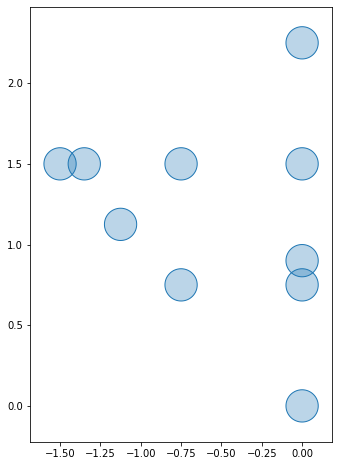

In [131]:
pileDia = Pile[2]/1000/2
pileCenters = pileCenterGrps[0]
pileCircles = go(
    pileCenters,
    map(lambda x: x.buffer(pileDia)),list,
)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
list(map(lambda x: plot_polygon(x, ax=ax, add_points=False), pileCircles))
ax.axes.set_aspect(aspect=1)
# ax.set_xlim(min_val, max_val)
# ax.set_ylim(min_val, max_val)
plt.show()


In [141]:
def showPLT(datas):
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    list(map(lambda x: plot_polygon(x, ax=ax, add_points=False), datas))
    ax.axes.set_aspect(aspect=1)

In [132]:
shapely.Geometry

shapely.lib.Geometry

In [133]:
nlat=   math.ceil(max(Ser[1],Ser[2])/Pile[1])
nver=   math.ceil(Ser[0]/Pile[0])
n=      max(nlat,nver,3)

Pxser =    [
           (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[4])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[3])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
           for i in range(n)
           ]

Pyser =    [
           (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[3])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[4])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
           for i in range(n)
           ]

In [134]:
while (np.max(Pxser)>=Pile[0] or (np.min(Pxser)<=0 and abs(np.min(Pxser))>=Pile[2])) and (np.max(Pyser)>=Pile[0] or (np.min(Pyser)<=0 and abs(np.min(Pyser))>=Pile[2])):      # NG 조건
               
        n = n+1                 # NG 조건 시, n을 1씩 늘려서 진행

        Pxser =    [
        (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[4])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[3])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
                   ]
                        
        Pyser =    [
        (Ser[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Ser[3])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Ser[4])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
                   ]

        if n > 10:              # n 개수 9 이상은 다루지 않음
                print('이건 사람 불러야돼')
                break

else :
        n = n
        Pxser = Pxser
        Pyser = Pyser

if np.max(Pxser)<Pile[0] and (np.min(Pxser)>0 or abs(np.min(Pxser))<Pile[2]):                           # X 방향 배치가 OK 일 시
        dir = 1
        print("Pile n = " + str(n))
        print("Pxser = " + str(Pxser))
        print("Ps = " + str(Pile[0]) + " > " + str(np.max(Pxser)))

        if np.min(Pxser)>0:
                print("Ts = " + str(Pile[2]) + " > 0")
        else :
                print("Ts = " + str(Pile[2]) + " > " + str(abs(np.min(Pxser))))

elif np.max(Pyser)<Pile[0] and (np.min(Pyser)>0 or abs(np.min(Pyser))<Pile[2]):                         # Y 방향 배치가 OK 일 시
        dir = 2
        print("Pile n = " + str(n))
        print("Pyser = " + str(Pyser))
        print("Ps = " + str(Pile[0]) + " > " + str(np.max(Pyser)))
        
        if np.min(Pyser)>0:
                print("Ts = " + str(Pile[2]) + " > 0")
        else :
                print("Ts = " + str(Pile[2]) + " > " + str(abs(np.min(Pyser))))      

Pile n = 3
Pxser = [1007.3333333333334, 1007.3333333333334, 1007.3333333333334]
Ps = 1300 > 1007.3333333333334
Ts = 200 > 0


In [135]:
Pxuls =    [
        (Uls[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Uls[4])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Uls[3])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
           ]

Pyuls =    [
        (Uls[0]+(w*Lxy[0][n-1]*Lxy[1][n-1]))/n+(abs(Uls[3])*Xi[i][n-1])/Xi2.sum(axis=0)[n-1]+(abs(Uls[4])*Yi[i][n-1])/Yi2.sum(axis=0)[n-1]
        for i in range(n)
           ]

if dir == 1:
    P = Pxuls               # 계수하중에 의한 Pile 반력 (X 방향 배치가 OK일 시)

elif dir == 2:
    P = Pyuls               # 계수하중에 의한 Pile 반력 (Y 방향 배치가 OK일 시)

print("Puls = " + str(P))

Puls = [1349.3333333333333, 1349.3333333333333, 1349.3333333333333]


In [136]:
def Ceil(x):
    return (x*20-x*20%1+1)/20                                               # 0.05 올림 식 정의
def ΦVc1(x):
    return Pi*vc*2*(Cx+Cy+4*x)*x                                            # 2 Way Shear at d/2 from Column face 식 정의
def ΦVc2(x,y):
    return Pi*vc/2*x*y                                                      # 1 Way Shear at d from Column face 식 정의
def ΦVc3a(x):
    return Pi*vc*math.pi*(Pile[3]+x)*x                                      # 2 Way Shear at d/2 from Pile (Internal) 식 정의 1
def ΦVc3b(x):
    return Pi*vc*(math.pi*(Pile[3]+x)+2*S)*x                                # 2 Way Shear at d/2 from Pile (Internal) 식 정의 2
def ΦVc4a(x):
    return Pi*vc*(math.pi*(Pile[3]+x)/4+math.sqrt(2)*S+(Pile[3]+x))*x       # 2 Way Shear at Corner Pile 식 정의 1
def ΦVc4b(x):
    return Pi*vc*(math.pi*(Pile[3]+x)/4+S)*x                                # 2 Way Shear at Corner Pile 식 정의 2
def ΦVc5(x):
    return Pi*vc/2*(math.sqrt(2)*S+(Pile[3]+x))*x                           # 1 Way Shear at Corner Pile 식 정의

Pi = 0.75
λ = 1
vc = 0.33 * λ * math.sqrt(Mat[0]) * 1000                                    # 2 way shear 기준 vc (1 way는 이 값의 절반 사용)

# Pedestal Size Estimation (Square)

Cx = Ped[0]
Cy = Ped[1]

print (Cx,Cy)


0.6 1.0


n = 3 Pile
d = 0.75 (Governing Thickness)
2 Way Shear at d/2 From Column Face
    ΦVc = 8366.232 kN
    Vu = 2616.054 kN
1 Way Shear at d From Column Face
    ΦVc = 1295.857 kN
    Vu = 1280.49 kN
2 Way Shear at d/2 from Pile
    ΦVc = 6299.219 kN
    Vu = 2698.667 kN
2 Way Shear at Corner Pile
    ΦVc = 2256.835 kN
    Vu = 1349.333 kN
1 Way Shear at Corner Pile
    ΦVc = 1532.894 kN
    Vu = 1349.333 kN
0.5 0.75 0.40 0.50 0.70


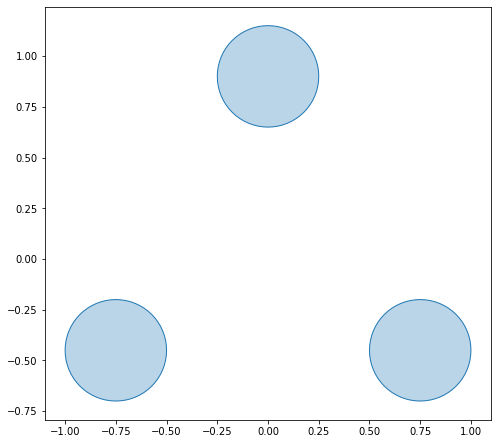

In [142]:
d = Symbol('d')

PileLocation = [
               Point(Xi[i,n-1],Yi[i,n-1]).buffer(Pile[3]/2)
               for i in range(n)
               ]
showPLT(PileLocation)

# 2 way shear at d/2 from column face

d1 = 0.25
TwoWayCritical = box(-(Cx/2+d1/2),-(Cy/2+d1/2),(Cx/2+d1/2),(Cy/2+d1/2))
SpecialProvision = box(-(Cx/2),-(Cy/2),(Cx/2),(Cy/2))

while True :

    TwoWayReaction = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],TwoWayCritical).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    if sum(TwoWayReaction)>ΦVc1(d1) :
        d1 = d1 + 0.05
    elif sum(TwoWayReaction) == 0 :
        SpecialProvisionReaction = [
                                (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                for i in range(n)
                                ]
        d1 = sum(SpecialProvisionReaction)/(Pi*vc*2*(Cx+Cy))
        break
    else :
        d1 = d1
        break

# 1 way shear at d from column face

d2 = 0.25
OneWayCritical1 = box(-Lxy[0,n-1]/2,-Lxy[1,n-1]/2,Lxy[0,n-1]/2,(Cy/2+d2))
OneWayCritical2 = box(-Lxy[0,n-1]/2,-Lxy[1,n-1]/2,(Cx/2+d2),Lxy[1,n-1]/2)
OneWayCritical3 = box(-Lxy[0,n-1]/2,-(Cy/2+d2),Lxy[0,n-1]/2,Lxy[1,n-1]/2)
OneWayCritical4 = box(-(Cx/2+d2),-Lxy[1,n-1]/2,Lxy[0,n-1]/2,Lxy[1,n-1]/2)
SpecialProvision1 = box(-Lxy[0,n-1]/2,-Lxy[1,n-1]/2,Lxy[0,n-1]/2,(Cy/2))
SpecialProvision2 = box(-Lxy[0,n-1]/2,-Lxy[1,n-1]/2,(Cx/2),Lxy[1,n-1]/2)
SpecialProvision3 = box(-Lxy[0,n-1]/2,-(Cy/2),Lxy[0,n-1]/2,Lxy[1,n-1]/2)
SpecialProvision4 = box(-(Cx/2),-Lxy[1,n-1]/2,Lxy[0,n-1]/2,Lxy[1,n-1]/2)

while True :

    OneWayReaction1 = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical1).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    OneWayReaction2 = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical2).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    OneWayReaction3 = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical3).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    OneWayReaction4 = [
                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical4).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                    for i in range(n)
                    ]
    if sum(OneWayReaction1)>ΦVc2(d2,Lxy[0][n-1]) or sum(OneWayReaction2)>ΦVc2(d2,Lxy[1][n-1]) or sum(OneWayReaction3)>ΦVc2(d2,Lxy[0][n-1]) or sum(OneWayReaction4)>ΦVc2(d2,Lxy[1][n-1]) :
        d2 = d2 + 0.05
    elif sum(OneWayReaction1) == 0 and sum(OneWayReaction1) == 0 and sum(OneWayReaction1) == 0 and sum(OneWayReaction1) == 0 :
        SpecialProvisionReaction1 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision1).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        SpecialProvisionReaction2 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision2).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        SpecialProvisionReaction3 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision3).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        SpecialProvisionReaction4 = [
                                    (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],SpecialProvision4).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                                    for i in range(n)
                                    ]
        d2 = max((sum(SpecialProvisionReaction1)/(Pi*vc/2*Lxy[0][n-1])),(sum(SpecialProvisionReaction2)/(Pi*vc/2*Lxy[1][n-1])),(sum(SpecialProvisionReaction3)/(Pi*vc/2*Lxy[0][n-1])),(sum(SpecialProvisionReaction4)/(Pi*vc/2*Lxy[1][n-1])))
        break
    else :
        d2 = d2
        break

# 2 Way Shear at d/2 from Pile (Internal)

def create_circle_dict(circles, attribute):
    return {'Poly': circles, 'Reaction': attribute}

def distance_between_circles(circle1, circle2):
    return round(circle1['Poly'].centroid.distance(circle2['Poly'].centroid),2)

def find_circle_combinations(circles, target_distance):
    combination_list = []
    for circle1, circle2 in combinations(circles, 2):
        distance = distance_between_circles(circle1, circle2)
        if distance < target_distance:
            combination_list.append((circle1, circle2))
    return combination_list

def calculate_attribute_sum(combination):
    return sum([circle['Reaction'] for circle in combination])

PileLandR = [create_circle_dict(PileLocation[i], P[i]) for i in range(n)]

PileGroup = find_circle_combinations(PileLandR, 1.1*S)

attribute_sum = [
                calculate_attribute_sum(combination) for combination in PileGroup
                ]

d3a = Ceil(max(solve(ΦVc3a(d)-max(list(map(abs,P))),d)))
d3b = Ceil(max(solve(ΦVc3b(d)-max(attribute_sum),d)))

if d3a <= (S-Pile[3])/2:
    d3 = d3a

else :
    d3 = d3b

# 2 Way Shear at Corner Pile & 1 Way Shear at Corner Pile

if n==3 :
    d4 = max(Ceil(max(solve(ΦVc4a(d)-abs(P[0]),d))),Ceil(max(solve(ΦVc4b(d)-max(abs(P[1]),abs(P[2])),d))))
    d5 = Ceil(max(solve(ΦVc5(d)-max(abs(P[1]),abs(P[2])),d)))
if n==4 :
    d4 = Ceil(max(solve(ΦVc4b(d)-max(list(map(abs,P))),d)))
    d5 = Ceil(max(solve(ΦVc5(d)-max(list(map(abs,P))),d)))
if n==5 :
    d4 = Ceil(max(solve(ΦVc4b(d)-max(P[0],P[1],P[3],P[4]),d)))
    d5 = Ceil(max(solve(ΦVc5(d)-max(P[0],P[1],P[3],P[4]),d)))
if n==6 : 
    d4 = max(Ceil(max(solve(ΦVc4a(d)-max(P[2],P[3]),d))),Ceil(max(solve(ΦVc4b(d)-max(P[0],P[1],P[4],P[5]),d))))
    d5 = Ceil(max(solve(ΦVc5(d)-max(P[0],P[1],P[4],P[5]),d)))
if n==7 : 
    d4 = Ceil(max(solve(ΦVc4a(d)-max(P[0],P[1],P[2],P[4],P[5],P[6]),d)))
    d5 = Ceil(max(P[0],P[6])/(Pi*vc/2*Lxy[0][n-1]))
if n==8 :
    d4 = max(Ceil(max(solve(ΦVc4a(d)-max(P[3],P[4]),d))),Ceil(max(solve(ΦVc4b(d)-max(P[0],P[1],P[6],P[7]),d))))
    d5 = Ceil(max(solve(ΦVc5(d)-max(P[0],P[1],P[6],P[7]),d)))
if n==9 :
    d4 = max(Ceil(max(solve(ΦVc4a(d)-max(abs(P[1]),abs(P[3]),abs(P[5]),abs(P[7])),d))),Ceil(max(solve(ΦVc4b(d)-max(abs(P[0]),abs(P[2]),abs(P[6]),abs(P[8])),d))))
    d5 = Ceil(max(solve(ΦVc5(d)-max(abs(P[0]),abs(P[2]),abs(P[6]),abs(P[8])),d)))

dt = max(d1,d2,d3,d4,d5)

# Design Check

# 2 way shear at d/2 from column face Vu 계산

TwoWayCriticalDC = box(-(Cx/2+dt/2),-(Cy/2+dt/2),(Cx/2+dt/2),(Cy/2+dt/2))
TwoWayReactionDC = [
        (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],TwoWayCriticalDC).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
        for i in range(n)
        ]
Vu1 = sum(TwoWayReactionDC)

if Vu1 > 0 or Vu1 < 0 : 
    Vu1 = Vu1
else :
    Vu1 = sum(SpecialProvisionReaction)

# 1 way shear at d from column face Vu 계산

OneWayCritical1DC = box(-Lxy[0,n-1]/2,-Lxy[1,n-1]/2,Lxy[0,n-1]/2,(Cy/2+dt))
OneWayCritical2DC = box(-Lxy[0,n-1]/2,-Lxy[1,n-1]/2,(Cx/2+dt),Lxy[1,n-1]/2)
OneWayCritical3DC = box(-Lxy[0,n-1]/2,-(Cy/2+dt),Lxy[0,n-1]/2,Lxy[1,n-1]/2)
OneWayCritical4DC = box(-(Cx/2+dt),-Lxy[1,n-1]/2,Lxy[0,n-1]/2,Lxy[1,n-1]/2)

OneWayReaction1DC = [
                (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical1).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                for i in range(n)
                ]
OneWayReaction2DC = [
                (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical2).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                for i in range(n)
                ]
OneWayReaction3DC = [
                (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical3).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                for i in range(n)
                ]
OneWayReaction4DC = [
                (round(math.pi*(Pile[3]/2)**2,3)-round(shapely.intersection(PileLocation[i],OneWayCritical4).area,3))/round(math.pi*(Pile[3]/2)**2,3)*P[i]
                for i in range(n)
                ]

if (sum(OneWayReaction1DC) or sum(OneWayReaction1DC)) == max(sum(OneWayReaction1DC),sum(OneWayReaction2DC),sum(OneWayReaction3DC),sum(OneWayReaction4DC)) :
    L = Lxy[0][n-1]
else : 
    L = Lxy[1][n-1]

Vu2 = max(sum(OneWayReaction1DC),sum(OneWayReaction2DC),sum(OneWayReaction3DC),sum(OneWayReaction4DC))

if Vu2 > 0 or Vu2 < 0 : 
    Vu2 = Vu2
else : 
    Vu2 = max(sum(SpecialProvisionReaction1),sum(SpecialProvisionReaction2),sum(SpecialProvisionReaction3),sum(SpecialProvisionReaction4))
    if (sum(SpecialProvisionReaction1) or sum(SpecialProvisionReaction3)) == max(sum(SpecialProvisionReaction1),sum(SpecialProvisionReaction2),sum(SpecialProvisionReaction3),sum(SpecialProvisionReaction4)) :
        L = Lxy[0][n-1]
    else : 
        L = Lxy[1][n-1]

# 2 Way Shear at d/2 from Pile (Internal) Vu 계산

if dt <= (S-Pile[3])/2 :
    Vu3 = max(list(map(abs,P)))
    ΦVc3 = ΦVc3a(dt)
else :
    Vu3 = max(attribute_sum)
    ΦVc3 = ΦVc3b(dt)

# 2 Way Shear at Corner Pile & 1 Way Shear at Corner Pile Vu 계산

if n==3 :
    if Ceil(max(solve(ΦVc4a(d)-abs(P[0]),d)))>=Ceil(max(solve(ΦVc4b(d)-max(abs(P[1]),abs(P[2])),d))) : 
        Vu4 = abs(P[0])
        ΦVc4 = ΦVc4a(dt)
    else :
        Vu4 = max(abs(P[1]),abs(P[2]))
        ΦVc4 = ΦVc4b(dt)
    Vu5 = max(P[1],P[2])
if n==4 :
    Vu4 = max(list(map(abs,P)))
    ΦVc4 = ΦVc4b(dt)
    Vu5 = max(list(map(abs,P)))
if n==5 :
    Vu4 = max(P[0],P[1],P[3],P[4])
    ΦVc4 = ΦVc4b(dt)
    Vu5 = max(P[0],P[1],P[3],P[4])
if n==6 : 
    if Ceil(max(solve(ΦVc4a(d)-max(P[2],P[3]),d)))>=Ceil(max(solve(ΦVc4b(d)-max(P[0],P[1],P[4],P[5]),d))) :
        Vu4 = max(P[2],P[3])
        ΦVc4 = ΦVc4a(dt)
    else :
        Vu4 = max(P[0],P[1],P[4],P[5])
        ΦVc4 = ΦVc4b(dt)
    Vu5 = max(P[0],P[1],P[4],P[5])
if n==7 : 
    Vu4 = max(P[0],P[1],P[2],P[4],P[5],P[6])
    ΦVc4 = ΦVc4a(dt)
    Vu5 = max(P[0],P[6])
if n==8 :
    if Ceil(max(solve(ΦVc4a(d)-max(P[3],P[4]),d)))>=Ceil(max(solve(ΦVc4b(d)-max(P[0],P[1],P[6],P[7]),d))) :
        Vu4 = max(P[3],P[4])
        ΦVc4 = ΦVc4a(dt)
    else :
        Vu4 = max(P[0],P[1],P[6],P[7])
        ΦVc4 = ΦVc4b(dt)
    Vu5 = max(P[0],P[1],P[6],P[7])
if n==9 :
    if Ceil(max(solve(ΦVc4a(d)-max(abs(P[1]),abs(P[3]),abs(P[5]),abs(P[7])),d)))>=Ceil(max(solve(ΦVc4b(d)-max(abs(P[0]),abs(P[2]),abs(P[6]),abs(P[8])),d))) : 
        Vu4 = max(abs(P[1]),abs(P[3]),abs(P[5]),abs(P[7]))
        ΦVc4 = ΦVc4a(dt)
    else :
        Vu4 = max(abs(P[0]),abs(P[2]),abs(P[6]),abs(P[8]))
        ΦVc4 = ΦVc4b(dt)
    Vu5 = max(abs(P[0]),abs(P[2]),abs(P[6]),abs(P[8]))

print("n = " + str(n) + " Pile")
print("d = " + str(round(dt,2)) + " (Governing Thickness)")
print("2 Way Shear at d/2 From Column Face\n" + "    ΦVc = " + str(round(ΦVc1(dt),3)) + " kN\n" + "    Vu = " + str(round(Vu1,3)) + " kN")
print("1 Way Shear at d From Column Face\n" + "    ΦVc = " + str(round(ΦVc2(dt,L),3)) + " kN\n" + "    Vu = " + str(round(Vu2,3)) + " kN")
print("2 Way Shear at d/2 from Pile\n" + "    ΦVc = " + str(round(ΦVc3,3)) + " kN\n" + "    Vu = " + str(round(Vu3,3)) + " kN")
print("2 Way Shear at Corner Pile\n" + "    ΦVc = " + str(round(ΦVc4,3)) + " kN\n" + "    Vu = " + str(round(Vu4,3)) + " kN")
print("1 Way Shear at Corner Pile\n" + "    ΦVc = " + str(round(ΦVc5(dt),3)) + " kN\n" + "    Vu = " + str(round(Vu5,3)) + " kN")
print(round(d1,2),round(d2,2),round(d3,2),round(d4,2),round(d5,2))

In [138]:
Depth = dt+Pile[5]+Mat[2]
Conc = Lxy[0][n-1]*Lxy[1][n-1]*Depth

print("Total Depth of FDN\n" + "    D = " + str(round(Depth,3)) + " m")
print("FDN Conc Volumne\n" + "    V = " + str(round(Conc,3)) + " m3")

Total Depth of FDN
    D = 0.9 m
FDN Conc Volumne
    V = 7.695 m3


In [139]:
# Mu 계산

def find_circles_distance_from_axis(circles,location):
    result1 = []
    result2 = []
    result3 = []
    result4 = []
    if location == 'xplus' :
        for circle in circles:
            distance = circle['Poly'].centroid.x 
            if distance > 0.01 :
                result1.append(circle)
        return result1
    if location == 'xminus' :
        for circle in circles:
            distance = circle['Poly'].centroid.x 
            if distance < -0.01 :
                result2.append(circle)
        return result2
    if location == 'yplus' :
        for circle in circles:
            distance = circle['Poly'].centroid.y
            if distance > 0.01 :
                result3.append(circle)
        return result3
    if location == 'yminus' :
        for circle in circles:
            distance = circle['Poly'].centroid.y 
            if distance < -0.01 :
                result4.append(circle)
        return result4

def calculate_distance_attribute_product(circle,direction):
    if direction == 'xdir' :
        distance = abs(circle['Poly'].centroid.x-Cx/2) 
        return distance * float(circle['Reaction'])
    if direction == 'ydir' :
        distance = abs(circle['Poly'].centroid.y-Cy/2) 
        return distance * float(circle['Reaction'])

def Total_Moment(PileAxis,direction) :
    result5 = []
    for circle in PileAxis :
        result5.append(calculate_distance_attribute_product(circle,direction))
    return sum(result5)

circles_within_Xdistance1 = find_circles_distance_from_axis(PileLandR,'xplus')
circles_within_Xdistance2 = find_circles_distance_from_axis(PileLandR,'xminus')
circles_within_Ydistance1 = find_circles_distance_from_axis(PileLandR,'yplus')
circles_within_Ydistance2 = find_circles_distance_from_axis(PileLandR,'yminus')

Muxbot = max(Total_Moment(circles_within_Xdistance1,'xdir'),Total_Moment(circles_within_Xdistance2,'xdir'),0)
Muxtop = min(Total_Moment(circles_within_Xdistance1,'xdir'),Total_Moment(circles_within_Xdistance2,'xdir'),0)
Muybot = max(Total_Moment(circles_within_Ydistance1,'ydir'),Total_Moment(circles_within_Ydistance2,'ydir'),0)
Muytop = min(Total_Moment(circles_within_Ydistance1,'ydir'),Total_Moment(circles_within_Ydistance2,'ydir'),0)

#각 방향별 휨 철근 설계

if Muxbot <= Muybot : 
    dxbot = (dt - Mat[3]/(2*1000))*1000
    dybot = (dt - 3*Mat[3]/(2*1000))*1000
if Muxbot > Muybot : 
    dxbot = (dt - 3*Mat[3]/(2*1000))*1000
    dybot = (dt - Mat[3]/(2*1000))*1000
if Muxtop <= Muytop : 
    dxtop = (dt - Mat[3]/(2*1000))*1000
    dytop = (dt - 3*Mat[3]/(2*1000))*1000
if Muxtop > Muytop : 
    dxtop = (dt - 3*Mat[3]/(2*1000))*1000
    dytop = (dt - Mat[3]/(2*1000))*1000

def a1(depth,Mu) :
    return ((-0.9*0.85*Mat[0]*1000*depth)+((0.9*0.85*Mat[0]*1000*depth)**2-4*(-0.9*0.85*Mat[0]*1000*0.5)*(-Mu*10**6/Lxy[1][n-1]))**0.5)/(2*(-0.9*0.85*Mat[0]*1000*0.5))
def a2(depth,Mu) : 
    return ((-0.9*0.85*Mat[0]*1000*depth)-((0.9*0.85*Mat[0]*1000*depth)**2-4*(-0.9*0.85*Mat[0]*1000*0.5)*(-Mu*10**6/Lxy[0][n-1]))**0.5)/(2*(-0.9*0.85*Mat[0]*1000*0.5))

if a1(dxbot,Muxbot) < 0 :
    a = a2(dxbot,Muxbot)
if a2(dxbot,Muxbot) < 0 : 
    a = a1(dxbot,Muxbot)
if a1(dxbot,Muxbot) > dxbot : 
    a = a2(dxbot,Muxbot)
if a2(dxbot,Muxbot) > dxbot : 
    a = a1(dxbot,Muxbot)
if a1(dybot,Muybot) < 0 :
    b = a2(dybot,Muybot)
if a2(dybot,Muybot) < 0 : 
    b = a1(dybot,Muybot)
if a1(dybot,Muybot) > dybot : 
    b = a2(dybot,Muybot)
if a2(dybot,Muybot) > dybot : 
    b = a1(dybot,Muybot)
if a1(dxtop,Muxtop) < 0 :
    c = a2(dxtop,Muxtop)
if a2(dxtop,Muxtop) < 0 : 
    c = a1(dxtop,Muxtop)
if a1(dxtop,Muxtop) > dxtop : 
    c = a2(dxtop,Muxtop)
if a2(dxtop,Muxtop) > dxtop : 
    c = a1(dxtop,Muxtop)
if a1(dytop,Muytop) < 0 :
    d = a2(dytop,Muytop)
if a2(dytop,Muytop) < 0 : 
    d = a1(dytop,Muytop)
if a1(dytop,Muytop) > dytop : 
    d = a2(dytop,Muytop)
if a2(dytop,Muytop) > dytop : 
    d = a1(dytop,Muytop)


print("Muxbot = ", round(Muxbot,0), "kNm")
Asxbot = max(0.85*Mat[0]*a*1000/Mat[1], 0.0018*1000*(dt+Mat[2])*1000)
print ("Asxbot = ", round(Asxbot,0), "mm2/m")
print ("    = ", round(Asxbot,0) * Lxy[1][n-1], "mm2")
sy1 = int(1000/(Asxbot/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy1)

print("Muybot = ", round(Muybot,0), "kNm")
Asybot = max(0.85*Mat[0]*b*1000/Mat[1], 0.0018*1000*(dt+Mat[2])*1000)
print ("Asybot = ", round(Asybot,0), "mm2/m")
print ("    = ", round(Asybot,0) * Lxy[0][n-1], "mm2")
sy2 = int(1000/(Asybot/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy2)

print("Muxtop = ", round(Muxtop,0), "kNm")
Asxtop = max(0.85*Mat[0]*c*1000/Mat[1], 0.0018*1000*(dt+Mat[2])*1000)
print ("Asxtop = ", round(Asxtop,0), "mm2/m")
print ("    = ", round(Asxtop,0) * Lxy[1][n-1], "mm2")
sy3 = int(1000/(Asxtop/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy3)

print("Muytop = ", round(Muytop,0), "kNm")
Asytop = max(0.85*Mat[0]*d*1000/Mat[1], 0.0018*1000*(dt+Mat[2])*1000)
print ("Asytop = ", round(Asytop,0), "mm2/m")
print ("    = ", round(Asytop,0) * Lxy[0][n-1], "mm2")
sy4 = int(1000/(Asytop/((Mat[3]/2)**2*3.141592))/50)*50
print ("D",Mat[3],"@",sy4)

Muxbot =  1417.0 kNm
Asxbot =  1909.0 mm2/m
    =  5440.650000000001 mm2
D 16 @ 100
Muybot =  2564.0 kNm
Asybot =  3619.0 mm2/m
    =  10857.0 mm2
D 16 @ 50
Muxtop =  0 kNm
Asxtop =  1440.0 mm2/m
    =  4104.0 mm2
D 16 @ 100
Muytop =  0 kNm
Asytop =  1440.0 mm2/m
    =  4320.0 mm2
D 16 @ 100
